### Steps: 
Import necessary libraries

Load Dataset

Understanding Problem statement

Data understanding 

Missing value check

EDA (Helps to understand trends)

PreProocessing - Dummy Creation 

train test split

scaling
## Importing necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Load

In [3]:
df = pd.read_csv("data_housing.csv")

In [4]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [6]:
df.shape

(506, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# Problem statement: Train a linear regration model to predict the price of housing using given information

In [9]:
# targe dataset is numnerical so using linear regration 

In [10]:
# :Attribute Information (in order):
# - CRIM per capita crime rate by town
# - ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
# - INDUS proportion of non-retail business acres per town 
# - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
# - NOX nitric oxides concentration (parts per 10 million)
# - RM average number of rooms per dwelling 
# - AGE proportion of owner-occupied units built prior to 1940 
# - DIS weighted distances to five Boston employment centres 
# - RAD index of accessibility to radial highways
# - TAX full-value property-tax rate per $10,000 
# - PTRATIO pupil-teacher ratio by town 
# - B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town 
# - LSTAT % lower status of the population

## Missing values check

In [13]:
df.isnull().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Price      0.0
dtype: float64

In [12]:
#their are no missing values but if ther would have been any missing values 
#We need to impute or process then like we did or studied in EDA

In [14]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

In [15]:
num_cols=["CRIM","ZN","INDUS","NOX","RM","DIS","AGE","TAX","PTRATIO","B","LSTAT","Price"] 
cat_cols=["CHAS","RAD"]

## EDA

In [18]:
# univariate, bivariate and multivariate analysis

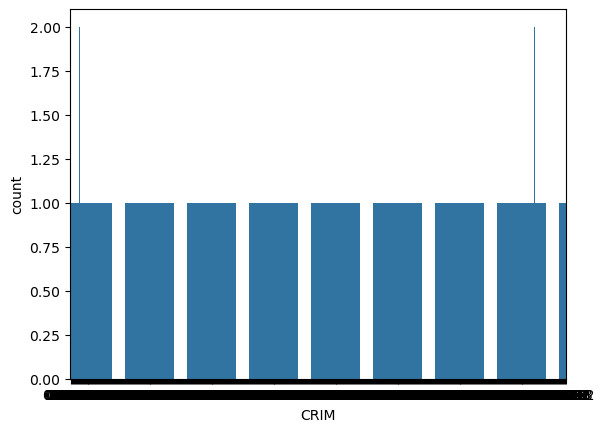

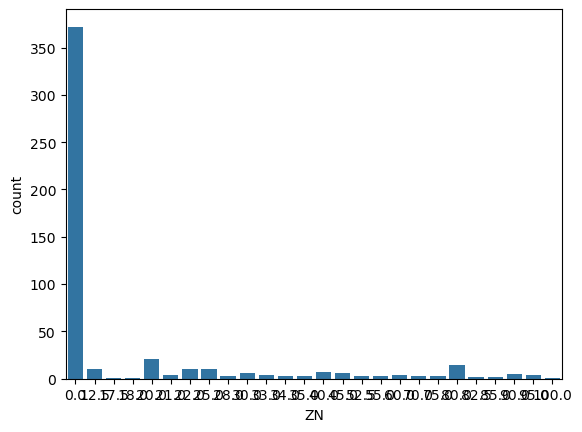

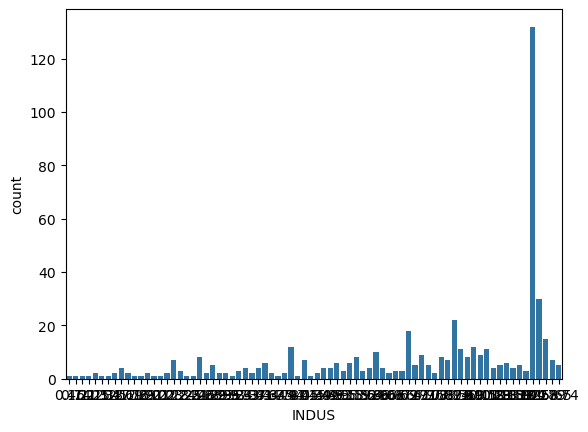

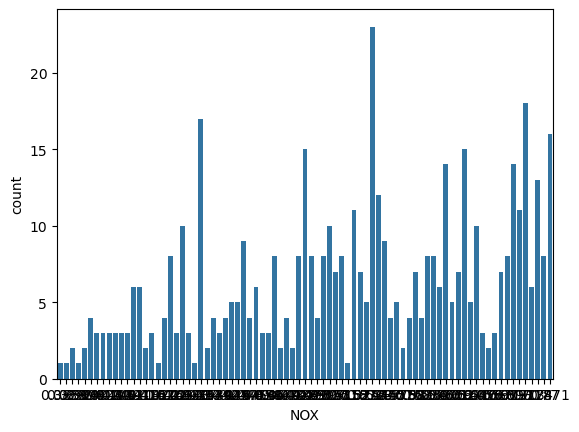

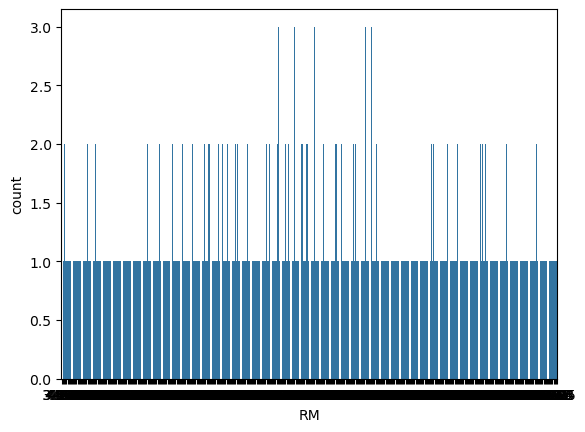

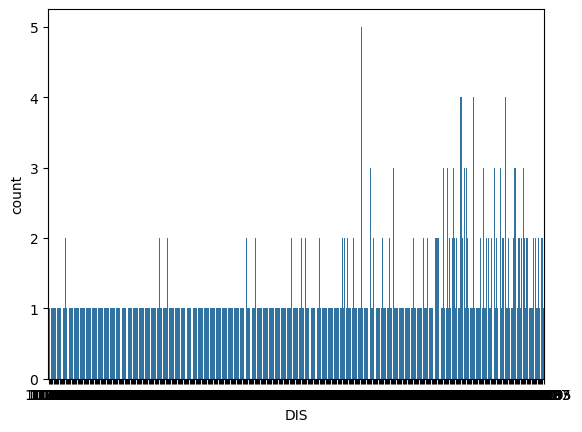

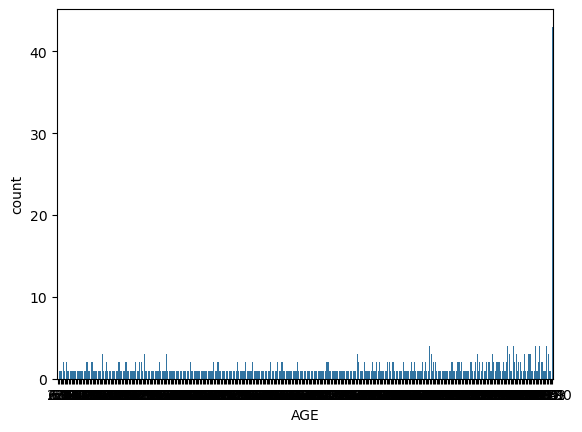

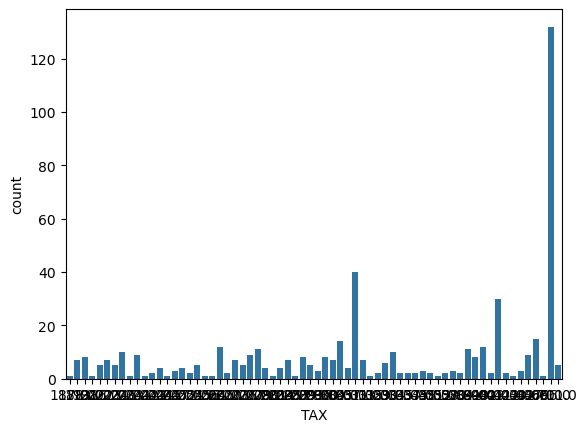

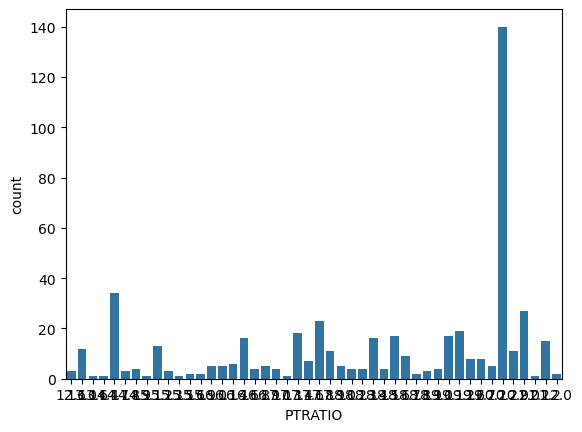

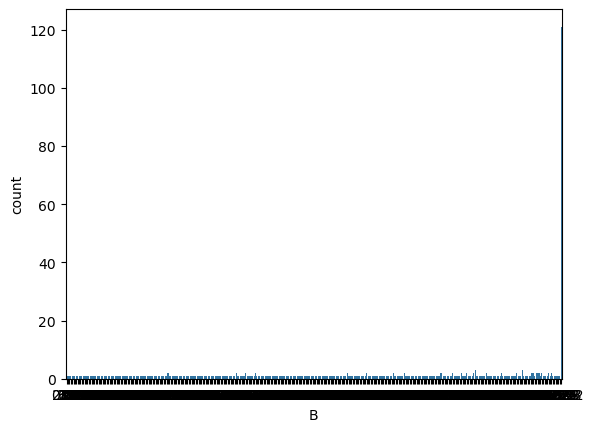

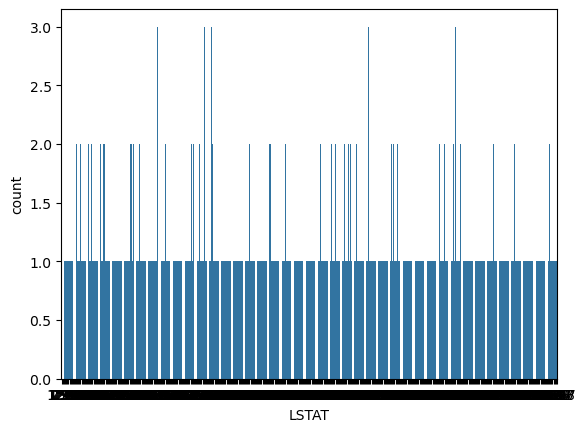

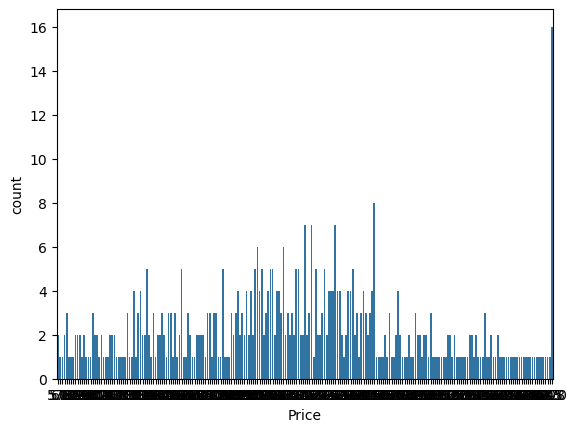

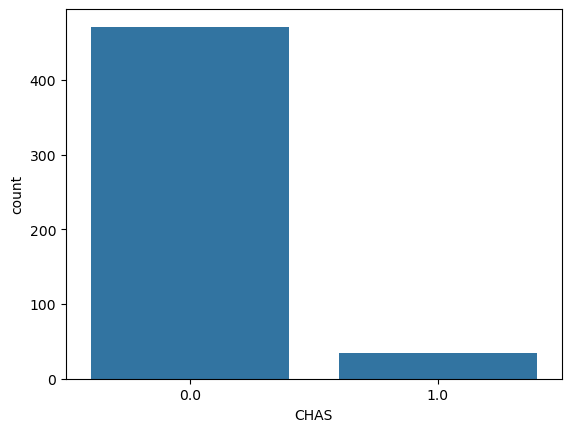

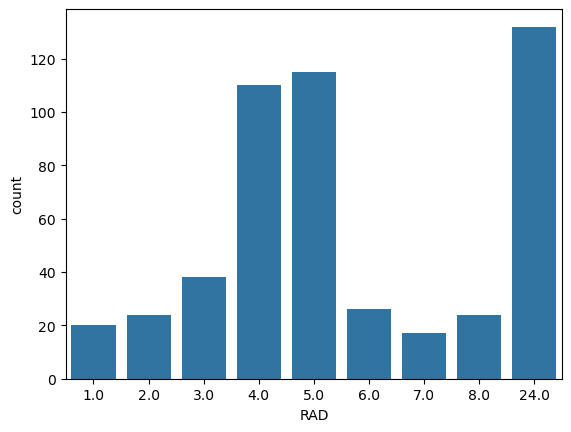

In [20]:
#Univariate Analysis
for i in num_cols:
    sns.countplot(x=df[i])
    plt.show()
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

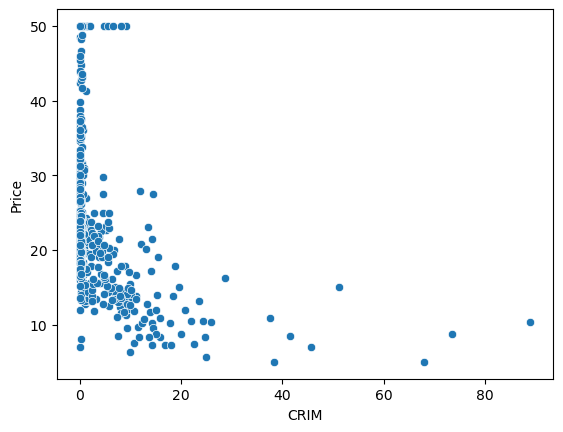

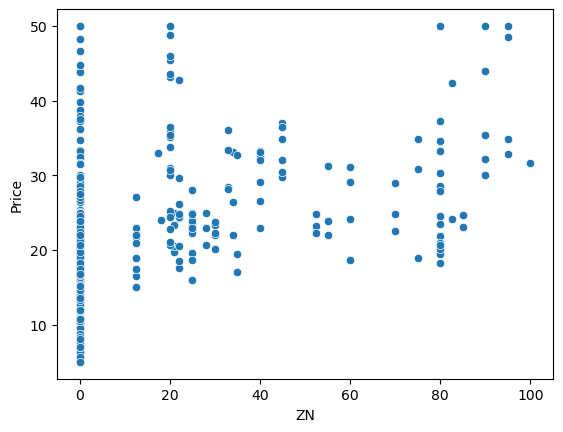

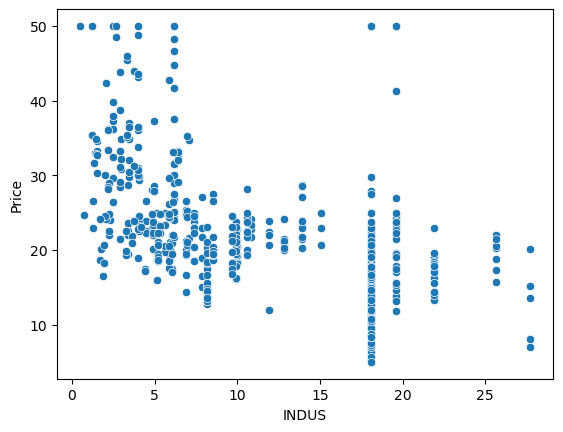

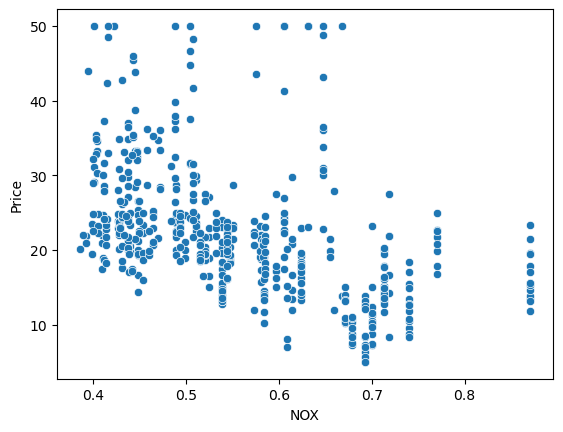

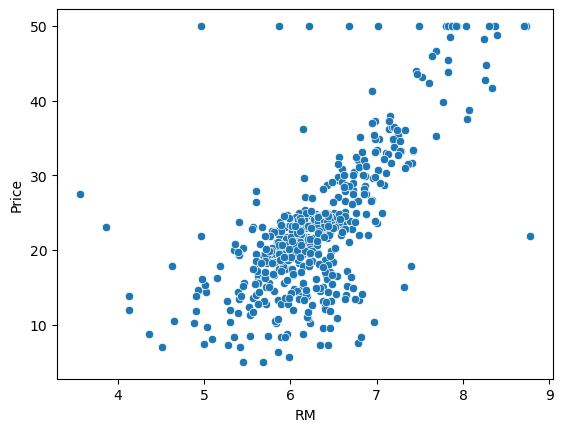

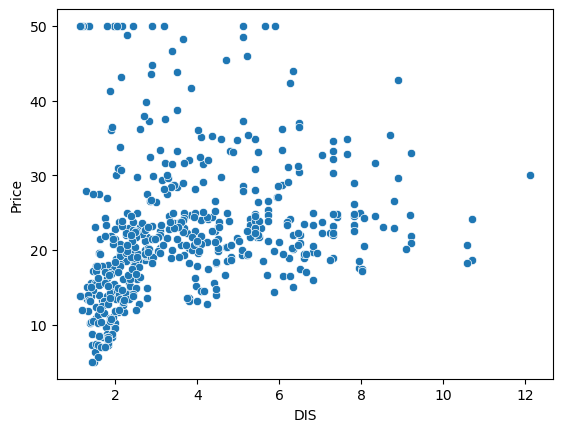

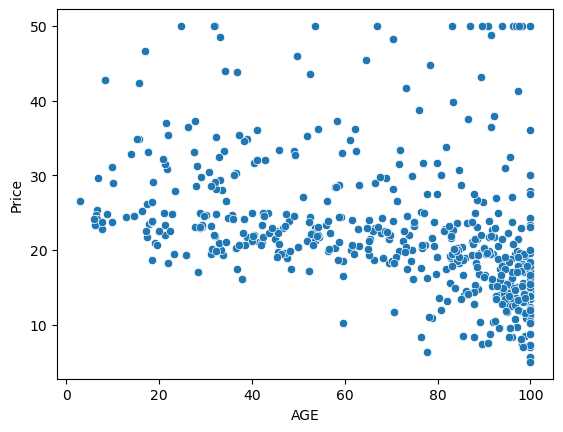

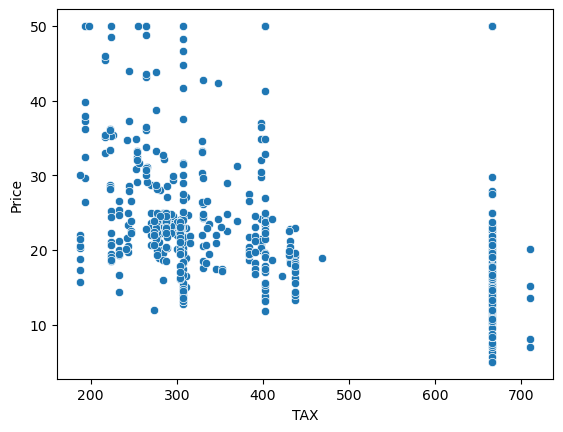

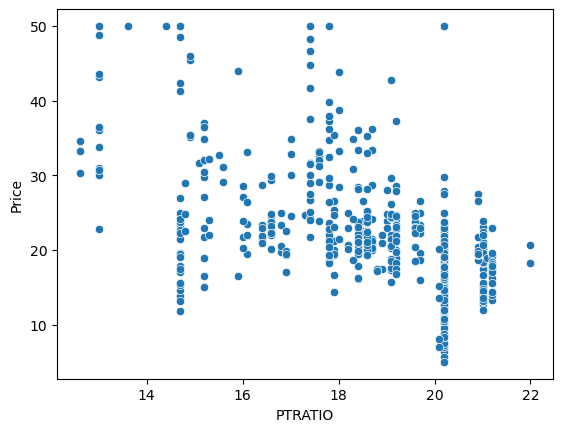

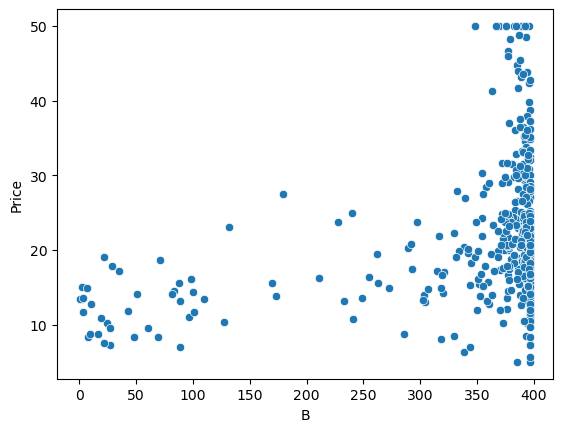

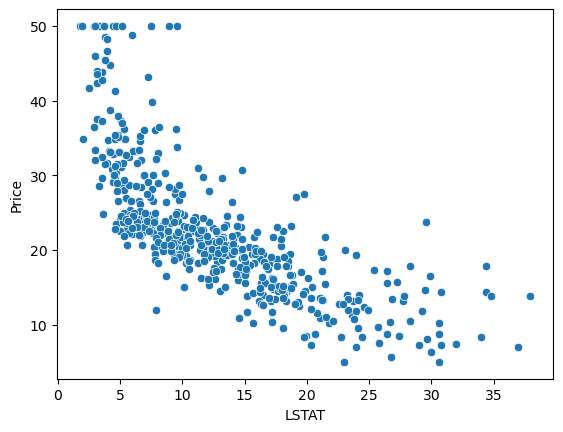

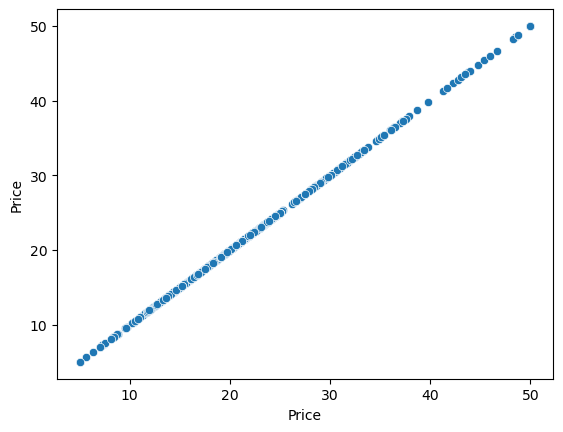

In [21]:
# Bivariate Analysis
for i in num_cols:
    sns.scatterplot(x=df[i], y=df["Price"])
    plt.show()

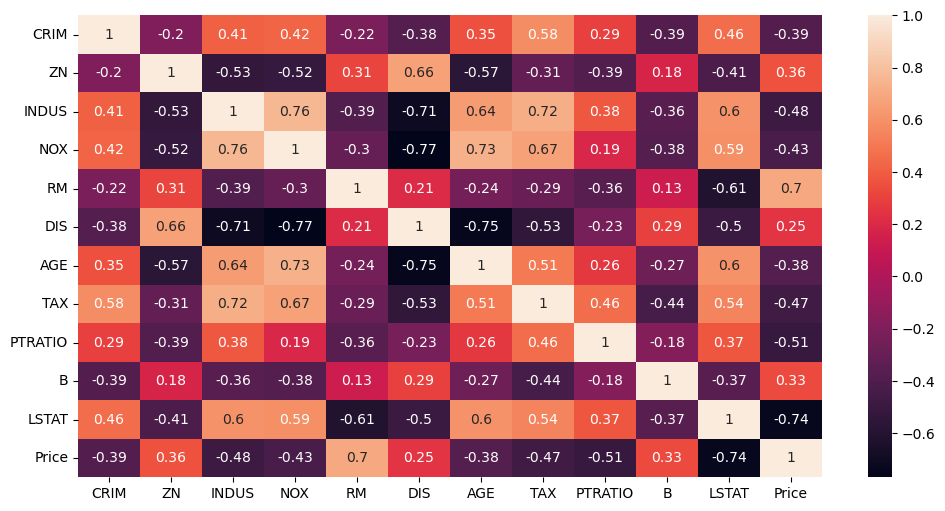

In [22]:
#Multivariate Analysis
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

## Pre Processing Steps
### Dumy variable creating (One Hot Encoding)

In [30]:
# Where we have more than 2 categories in categorical fetures, we need to create dummies for them
#Needs to be done for every catogariocal columns

In [24]:
df[cat_cols].head()

,CHAS,RAD
0,0.0,1.0
1,0.0,2.0
2,0.0,2.0
3,0.0,3.0
4,0.0,3.0


In [25]:
df["RAD"].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [27]:
df1=pd.get_dummies(df,columns=["RAD"],drop_first=True,dtype=int)

In [28]:
df1.shape

(506, 21)

In [29]:
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0',
       'RAD_5.0', 'RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0'],
      dtype='object')

## Train - Test Split

In [31]:
X=df1.drop(["Price"],axis=1)
y=df1["Price"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [34]:
print(X_train.shape)
print(X_test.shape)

(404, 20)
(102, 20)


## Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) # As test data is unseen data we can't fit on it

In [36]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [37]:
X_train_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,1.892434,-0.495778,1.035280,-0.288288,1.019549,-0.074765,1.128863,-1.175156,1.543468,0.813975,0.387891,1.262678,-0.203069,-0.293294,-0.535373,-0.543021,-0.239983,-0.196368,-0.22215,1.709482
1,-0.327672,-0.495778,-0.161802,-0.288288,-0.077387,-0.218185,-0.552953,-0.561852,-0.600514,-0.039554,0.424998,-0.910043,-0.203069,-0.293294,1.867857,-0.543021,-0.239983,-0.196368,-0.22215,-0.584972


## Feature selection

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=8) #8-25

In [40]:
selector=selector.fit(X_train_df,y_train)
selector.support_

array([False,  True, False, False,  True,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True])

In [41]:
X_train_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0', 'RAD_5.0',
       'RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0'],
      dtype='object')

In [42]:
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['ZN', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'RAD_24.0'], dtype='object')


In [43]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

In [44]:
print(X_train.shape)
print(X_test.shape)

(404, 8)
(102, 8)


## Modeling

In [45]:
import statsmodels.api as sm

In [50]:
X_train_sm=sm.add_constant(X_train) #X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [51]:
model1=sm.OLS(np.array(y_train),x_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          7.99e-102
Time:                        11:19:27   Log-Likelihood:                -1210.2
No. Observations:                 404   AIC:                             2438.
Df Residuals:                     395   BIC:                             2474.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6210      0.243     92.912      0.000      22.142      23.100
ZN             0.9510      0.357      2.661      0.008       0.248       1.654
NOX           -1.7966      0.472     -3.806      0.000      -2.725      -0.869
RM             2.5649      0.331      7.744      0.000       1.914       3.216
DIS           -2.9438      0.440     -6.689      0.000      -3.809      -2.079
TAX           -2.0034      0.627     -3.198      0.001      -3.235      -0.772
PTRATIO       -1.9939      0.321     -6.219      0.000      -2.624      -1.364
LSTAT         -4.1124      0.380    -10.812      0.000      -4.860      -3.365
RAD_24.0       1.8014      0.584      3.087      0.002       0.654       2.949
==============================================================================
Omnibus:                      139.674   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.273
Skew:                           1.480   Prob(JB):                    3.28e-125
Kurtosis:                       8.029   Cond. No.                         6.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Acceptable Range for p-value is 0.05
# Acceptable Range for VIF is <=5

In [54]:
y_train_pred=res3.predict(X_train_sm)
y_test_pred=res3.predict(X_test_sm)

NameError: name 'res3' is not defined

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i)
                 for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,1.000000
1,ZN,2.154506
2,NOX,3.758312
3,RM,1.850761
4,DIS,3.267930
5,TAX,6.622542
6,PTRATIO,1.734007
7,LSTAT,2.440413
8,RAD_24.0,5.744009
